<a href="https://colab.research.google.com/github/mnmahir/best-fyp/blob/main/System_web_app_(backend).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install anvil-uplink
import anvil.server
import anvil.media
# Google Drive
from google.colab import drive
# General
import math
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
!pip install image_slicer
import os
import glob
import image_slicer
# Keras Library
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img
# Others
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
model = tf.keras.models.load_model('/content/gdrive/MyDrive/FYP Stuff/Model/DenseNet201_All_Stain_Model.h5')




Mounted at /content/gdrive


In [ ]:
###########################
# Initialization
###########################
try: 
  os.mkdir('/content/sliced_img') # For before calling slice
except:
  print("Folder already created")

IMAGE_CLASSES = ['NORMAL','GRADE I','GRADE II','GRADE III']

Folder already created


In [ ]:
def get_label(predictions):
  pred_labels = np.argmax(predictions, axis=-1)
  return pred_labels
#####################################
# Slice image / remove sliced images
#####################################
#To be called before making prediction
def slice_image(ori_img, srow = 6, scol = 8): #later add row and col
  try: 
    os.mkdir('/content/sliced_img') # For before calling slice
  except:
    print("Folder already created")
  os.chdir('/content/sliced_img')

  ori_img.save('ori.png')
  image_slicer.slice('ori.png', row = srow, col = scol)
  os.remove('ori.png') #Delete original image
  os.chdir('/content')

# To be called after done with prediction and calculation
def remove_sliced_images():
  files = glob.glob('/content/sliced_img/*')  
  for f in files:
      os.remove(f)                      # Delete everything in folder


In [ ]:
anvil.server.connect("L3PK5MYQVJ4ZK5FTWKPZYKUD-FBM5VHPXV3N7HNS4")
@anvil.server.callable
def predict_click(img_file):
  global image_received, score
  with anvil.media.TempFile(img_file) as filename:
    img = load_img(filename)
  
  image_received = img # debug
  img = img.resize((224, 224))
  arr = image.img_to_array(img)
  arr = np.expand_dims(arr, axis=0)
  arr /= 255
  score = model.predict(arr)
  lbl = get_label(score) #Later use this to show overall predicted label
  send_image = anvil.media.from_file('test.png', '/content/') #To convert into anvil media object (filename, path)
  return str(IMAGE_CLASSES[lbl[0]]), send_image

# Debug Code

In [ ]:
slice_image(image_received)

Folder already created


In [ ]:
remove_sliced_images()

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1600x1200 at 0x7FE37218E2B0>
0
Folder already created
Size:  (1600, 1200)


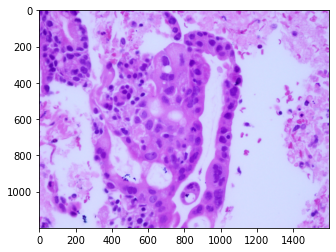

In [ ]:
# Run after click predict in anvil
print(image_received)
plt.imshow(image_received)
plt.savefig('test.png')
print(score)
a = get_label(score)
#print (IMAGE_CLASSES[a[0]])
slice_image(image_received)
print('Size: ',image_received.size)
